# FLP Assignment on Functional Data Processing

## Programming problem:
```
Create a program to efficiently process a large log file using functional programming techniques
using Python to extract relevant information and generate statistics. The following is an example of a log file:

```

#### To generate a Bogus Log file:

In [ ]:
log_levels = ["INFO", "ERROR", "WARNING", "DEBUG"]
actions = [
    "Starting server", "Connection timed out", "Disk space low", "User logged in: username123",
    "File uploaded: document.pdf", "Processing data", "Internal server error: database connection failed",
    "User logged out: username123"
]

def generate_log_file(file_path, num_rows=1000):
    start_time = datetime.now()
    with open(file_path, 'w') as f:
        for _ in range(num_rows):
            timestamp = (start_time + timedelta(seconds=random.randint(0, 3600))).strftime('%Y-%m-%d %H:%M:%S')
            log_level = random.choice(log_levels)
            message = random.choice(actions)
            f.write(f"{timestamp} - {log_level} - {message}\n")

generate_log_file('logfile.txt')

#### The necessary libraries:

In [1]:
import re
import pandas as pd
import random
from datetime import datetime, timedelta
from collections import Counter
from datetime import datetime
from functools import reduce
from itertools import groupby

In [2]:
# Higher-order function to apply a function to each element in a list
def map_func(func, iterable):
    return list(map(func, iterable))

# Higher-order function to filter elements in a list based on a condition
def filter_func(func, iterable):
    return list(filter(func, iterable))

# Higher-order function to reduce an iterable to a single value
def reduce_func(func, iterable, initializer=None):
    return reduce(func, iterable, initializer)

# Function to parse a log line using regex
def parse_log_line(line):
    regex = r"(?P<datetime>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - (?P<level>\w+) - (?P<message>.+)"
    match = re.match(regex, line)
    return match.groupdict() if match else None

# Function to process the log file and return log entries
def process_log(file_path):
    try:
        log_df = pd.read_csv(file_path, sep='\t', header=None, names=['log'])
        log_lines = log_df['log'].tolist()
        return filter_func(None, map_func(parse_log_line, log_lines))
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Recursive function to count elements
def count_occurrences(lst):
    if not lst:
        return Counter()
    return Counter({lst[0]: 1}) + count_occurrences(lst[1:])

# Function to generate statistics from log entries
def generate_statistics(log_entries):
    levels = [entry['level'] for entry in log_entries]
    messages = [entry['message'] for entry in log_entries]
    timestamps = [datetime.strptime(entry['datetime'], "%Y-%m-%d %H:%M:%S") for entry in log_entries]

    level_counts = count_occurrences(levels)
    message_counts = count_occurrences(messages)
    
    start_time = min(timestamps) if timestamps else None
    end_time = max(timestamps) if timestamps else None

    stats = {
        'level_counts': level_counts,
        'message_counts': message_counts,
        'total_entries': len(log_entries),
        'start_time': start_time,
        'end_time': end_time,
    }
    
    return stats

# Function to sort and group log entries by level
def group_by_level(log_entries):
    sorted_entries = sorted(log_entries, key=lambda x: x['level'])
    grouped_entries = {key: list(group) for key, group in groupby(sorted_entries, key=lambda x: x['level'])}
    return grouped_entries

def main(file_path):
    # Process the log file and generate statistics
    log_entries = process_log(file_path)
    if not log_entries:
        print("No log entries found.")
        return
    
    stats = generate_statistics(log_entries)
    grouped_entries = group_by_level(log_entries)

    # Display the statistics
    print("Log Level Counts:")
    for level, count in stats['level_counts'].items():
        print(f"{level}: {count}")
    
    print("\nMost Common Messages:")
    for message, count in stats['message_counts'].most_common(10):
        print(f"{message}: {count}")

    print("\nTotal Entries:", stats['total_entries'])
    print("Log Start Time:", stats['start_time'])
    print("Log End Time:", stats['end_time'])
    
    print("\nGrouped Entries by Level:")
    for level, entries in grouped_entries.items():
        print(f"\n{level}:")
        for entry in entries:
            print(entry)

if __name__ == "__main__":
    file_path = r'C:\Users\MD Raffaul Islam\Downloads\logfile.txt'  # Use raw string literal
    main(file_path)

Log Level Counts:
DEBUG: 238
ERROR: 269
INFO: 270

Most Common Messages:
Processing data: 141
Starting server: 131
User logged out: username123: 129
Internal server error: database connection failed: 128
Connection timed out: 122
User logged in: username123: 119
File uploaded: document.pdf: 117
Disk space low: 113

Total Entries: 1000
Log Start Time: 2024-05-22 22:30:41
Log End Time: 2024-05-22 23:30:29

Grouped Entries by Level:

DEBUG:
{'datetime': '2024-05-22 23:01:16', 'level': 'DEBUG', 'message': 'Starting server'}
{'datetime': '2024-05-22 22:30:42', 'level': 'DEBUG', 'message': 'Disk space low'}
{'datetime': '2024-05-22 23:22:41', 'level': 'DEBUG', 'message': 'User logged in: username123'}
{'datetime': '2024-05-22 23:13:18', 'level': 'DEBUG', 'message': 'Starting server'}
{'datetime': '2024-05-22 22:31:10', 'level': 'DEBUG', 'message': 'File uploaded: document.pdf'}
{'datetime': '2024-05-22 23:25:21', 'level': 'DEBUG', 'message': 'File uploaded: document.pdf'}
{'datetime': '2024-

## Explanation
#### Higher-Order Functions:
map_func: A higher-order function that applies a function to each element in an iterable using map.
filter_func: A higher-order function that filters elements based on a condition using filter.
reduce_func: A higher-order function that reduces an iterable to a single value using reduce.
 
#### Lambda Functions:
Used in group_by_level to sort and group log entries by their level.
 
#### Recursion:
count_occurrences: A recursive function to count occurrences of elements in a list.
 
#### Comprehensions:
List comprehensions are used in generate_statistics to extract levels, messages, and timestamps from log entries.
 
#### Immutability:
The parsed log entries and other intermediate results are not modified after creation, promoting immutability.


## Generating the stats:

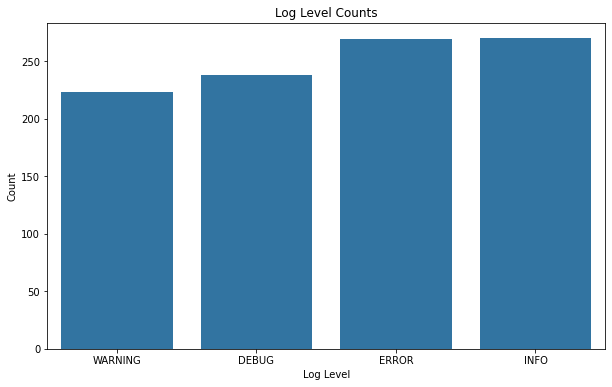

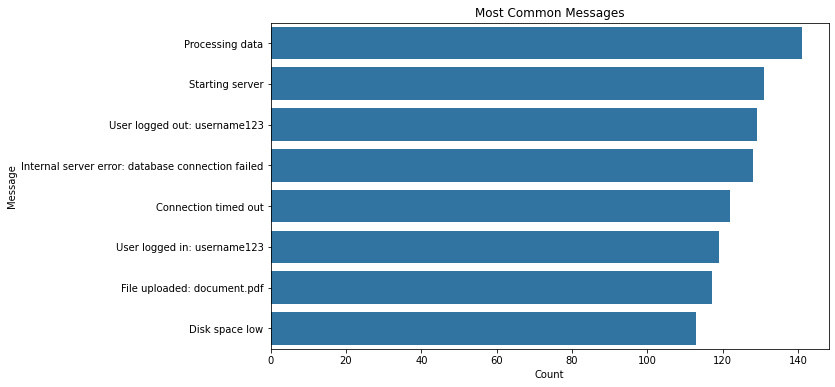

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from functools import reduce
from collections import Counter
import pandas as pd
import re
from datetime import datetime

# Define the necessary functions (map_func, filter_func, reduce_func, parse_log_line, process_log, count_occurrences, generate_statistics, group_by_level) here...

# Assuming you have these functions from your previous code:
# map_func, filter_func, reduce_func, parse_log_line, process_log,
# count_occurrences, generate_statistics, group_by_level

# Display visualizations function
def display_visualizations(stats):
    if stats is None:
        print("No statistics to display.")
        return

    # Plot log level counts
    levels, counts = zip(*stats['level_counts'].items())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(levels), y=list(counts))
    plt.title('Log Level Counts')
    plt.xlabel('Log Level')
    plt.ylabel('Count')
    plt.show()

    # Plot most common messages
    messages, counts = zip(*stats['message_counts'].most_common(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(y=list(messages), x=list(counts))
    plt.title('Most Common Messages')
    plt.xlabel('Count')
    plt.ylabel('Message')
    plt.show()

# Function to visualize recursion with a limited depth
def visualize_recursion(lst, max_depth=5):
    dot = graphviz.Digraph(comment='Recursion Tree')

    def add_nodes_edges(node_id, lst, depth):
        if not lst or depth > max_depth:
            dot.node(node_id, 'Counter()' if not lst else '...')
            return

        current = lst[0]
        remaining = lst[1:]
        current_node_id = f'{node_id}_{current}'
        remaining_node_id = f'{node_id}_remaining'
        
        dot.node(current_node_id, f'Counter({{\'{current}\': 1}})')
        dot.node(remaining_node_id, 'count_occurrences(remaining)')
        dot.edge(node_id, current_node_id)
        dot.edge(node_id, remaining_node_id)
        
        add_nodes_edges(remaining_node_id, remaining, depth + 1)
    
    add_nodes_edges('root', lst, 0)
    
    return dot

# Function to visualize the application of lambda functions
def visualize_lambda_functions():
    dot = graphviz.Digraph(comment='Lambda Functions')

    # Example list
    example_list = [1, 2, 3, 4, 5]

    # Visualization for map function
    map_dot = graphviz.Digraph(name='cluster_map')
    map_dot.attr(label='map(lambda x: x * 2, example_list)')
    map_dot.node('map_input', 'Input: [1, 2, 3, 4, 5]')
    map_dot.node('map_output', 'Output: [2, 4, 6, 8, 10]')
    map_dot.edge('map_input', 'map_output')
    dot.subgraph(map_dot)

    # Visualization for filter function
    filter_dot = graphviz.Digraph(name='cluster_filter')
    filter_dot.attr(label='filter(lambda x: x % 2 == 0, example_list)')
    filter_dot.node('filter_input', 'Input: [1, 2, 3, 4, 5]')
    filter_dot.node('filter_output', 'Output: [2, 4]')
    filter_dot.edge('filter_input', 'filter_output')
    dot.subgraph(filter_dot)

    # Visualization for reduce function
    reduce_dot = graphviz.Digraph(name='cluster_reduce')
    reduce_dot.attr(label='reduce(lambda x, y: x + y, example_list)')
    reduce_dot.node('reduce_input', 'Input: [1, 2, 3, 4, 5]')
    reduce_dot.node('reduce_output', 'Output: 15')
    reduce_dot.edge('reduce_input', 'reduce_output')
    dot.subgraph(reduce_dot)

    return dot

if __name__ == "__main__":
    file_path = r'C:\Users\MD Raffaul Islam\Downloads\logfile.txt'  # Use raw string literal
    
    # Process the log file and generate statistics
    log_entries = process_log(file_path)
    if not log_entries:
        print("No log entries found.")
    else:
        stats = generate_statistics(log_entries)

        # Display the visualizations
        display_visualizations(stats)

        # Visualize recursion tree with limited depth
        levels = [entry['level'] for entry in log_entries]
        recursion_tree = visualize_recursion(levels[:10])  # Visualize only the first 10 entries
        recursion_tree.render('recursion_tree', format='png', view=True)

        # Visualize lambda functions
        lambda_functions_dot = visualize_lambda_functions()
        lambda_functions_dot.render('lambda_functions', format='png', view=True)


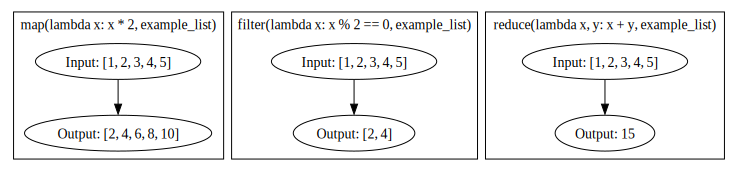

In [47]:
lambda_functions_dot

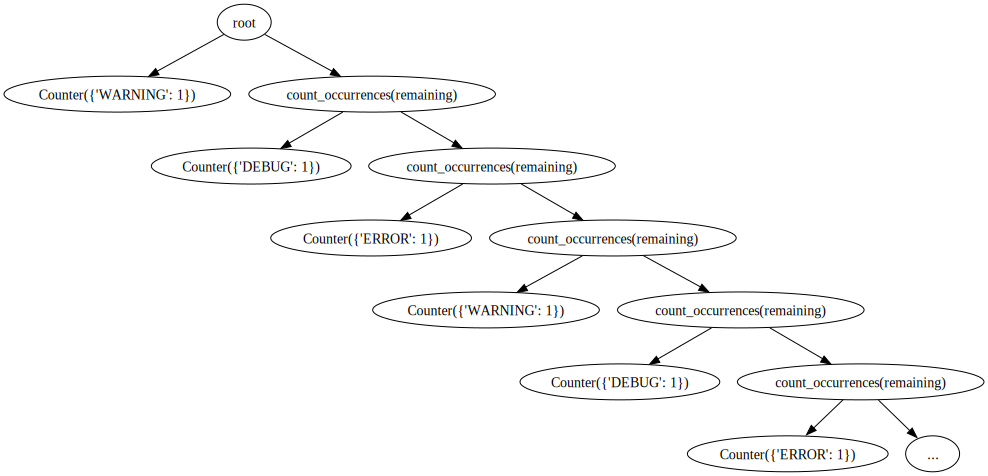

In [46]:
recursion_tree